# Prediksi Pergerakan Harga Saham PT Indo Tambangraya Megah Tbk Menggunakan Algoritma Recurrent Neural Networks dan Long-Short Term Memory

Pengetahuan tentang prediksi harga memiliki banyak alasan mendasar yang mendukung keberadaannya dalam berbagai bidang, terutama dalam konteks pasar keuangan. Menurut sudut pandang investor, prediksi harga membantu para investor dalam mengambil keputusan investasi yang lebih baik. Investor yang memahami arah pergerakan, cenderung dapat merencanakan strategi perdagangan mereka dengan lebih baik, memperkirakan potensi keuntungan dan risiko, serta mengoptimalkan kinerja portofolio mereka. Pengetahuan tentang prediksi harga juga penting dalam manajemen risiko, baik dari segi individu maupun lembaga lembaga keuangan dapat mengidentifikasi potensi kerugian dan mengambil langkah-langkah untuk melindungi aset mereka. yang dapat digunakan sebagai instrumen identifikasi potensi kerugian dan mengambil langkah-langkah untuk melindungi aset mereka. 

Selain itu, menurut sudut pandang bisnis, prediksi harga dapat membantu perusahaan dalam merencanakan strategi pemasaran, pengadaan bahan baku, dan pengelolaan rantai pasokan. Dengan demikian, pengetahuan tentang prediksi harga tidak hanya relevan bagi para investor, tetapi juga bagi individu dan organisasi dalam berbagai bidang untuk mengambil keputusan yang lebih baik dan mengelola risiko dengan lebih efektif.

In [20]:
# Import Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

# Ambil Data
data = yf.download(tickers = 'ITMG.JK', start = '2008-01-01',end = '2024-01-31')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,18900.0,18900.0,18900.0,18900.0,3415.477783,0
2008-01-03,18150.0,18300.0,18050.0,18150.0,3279.943848,2190500
2008-01-04,18750.0,18800.0,18300.0,18750.0,3388.372070,1255000
2008-01-07,20800.0,20850.0,18650.0,20800.0,3758.832520,7813500
2008-01-08,20600.0,21500.0,20300.0,20600.0,3722.690918,4348000


In [21]:
# Penambahan Indikator Teknikal
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

Tujuan dari kode di atas adalah untuk menambahkan beberapa indikator teknikal ke dalam data frame `data`. Indikator-indikator tersebut adalah:

1. **RSI (Relative Strength Index)**: RSI adalah sebuah indikator momentum yang mengukur kecepatan dan perubahan pergerakan harga. Indikator ini digunakan untuk mengetahui apakah suatu saham atau aset sudah overbought (terlalu banyak dibeli) atau oversold (terlalu banyak dijual). Di sini, RSI dihitung berdasarkan harga penutupan (`data.Close`) dengan panjang periode 15.

2. **EMAF (Exponential Moving Average Fast)**: EMAF adalah moving average eksponensial yang digunakan untuk mengetahui tren harga secara lebih responsif daripada moving average sederhana. EMAF dihitung berdasarkan harga penutupan (`data.Close`) dengan panjang periode 20.

3. **EMAM (Exponential Moving Average Medium)**: EMAM juga merupakan moving average eksponensial, namun dengan periode yang lebih panjang, sehingga memberikan gambaran tren harga dalam jangka waktu yang lebih luas. EMAM dihitung berdasarkan harga penutupan (`data.Close`) dengan panjang periode 100.

4. **EMAS (Exponential Moving Average Slow)**: EMAS juga merupakan moving average eksponensial dengan periode yang lebih panjang daripada EMAF dan EMAM, sehingga memberikan gambaran tren harga dalam jangka waktu yang lebih panjang lagi. EMAS dihitung berdasarkan harga penutupan (`data.Close`) dengan panjang periode 150.

Penambahkan indikator-indikator tersebut ke dalam data frame, diharapkan dapat menganalisis lebih lanjut pergerakan harga dan tren pasar saham atau aset lainnya.

In [22]:
# Menghitung perbedaan harga Adj Close dengan Harga Pembukaan
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

# Membuat Kelas Target
data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [23]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(5)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,24050.0,24250.0,23600.0,4375.963867,35.833171,27257.938665,27819.177920,26280.000000,-18815.085938,0,4184.914062
1,23000.0,23800.0,22650.0,4184.914062,33.339879,26852.420697,27723.748654,26236.556291,-18242.452637,0,4057.547363
2,22300.0,22800.0,22100.0,4057.547363,31.761328,26418.856821,27616.347691,26184.416473,-18978.694824,0,4221.305176
3,23200.0,23300.0,22850.0,4221.305176,35.939557,26112.299028,27528.895261,26144.887778,-20042.155762,0,4457.844238
4,24500.0,24650.0,23500.0,4457.844238,41.484495,25958.746740,27468.917137,26123.101185,-21064.714355,0,4685.285645


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.37140115 0.36576644 0.37382716 ... 0.56674082 0.         0.09147801]
 [0.3512476  0.35729745 0.35506173 ... 0.57940532 0.         0.08768532]
 [0.3378119  0.33847746 0.34419753 ... 0.56312236 0.         0.09256159]
 ...
 [0.40451056 0.41187541 0.41679012 ... 0.98673025 1.         0.76192518]
 [0.41890595 0.41422791 0.42617284 ... 0.98341281 1.         0.76490295]
 [0.42370441 0.41469841 0.43358025 ... 0.97898956 0.         0.75745853]]


In [6]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3818
[[[0.37140115 0.36576644 0.37382716 ... 0.46440053 0.51369092 0.47637545]
  [0.3512476  0.35729745 0.35506173 ... 0.45595605 0.51136975 0.47527384]
  [0.3378119  0.33847746 0.34419753 ... 0.44692755 0.50875738 0.47395173]
  ...
  [0.33205374 0.34882846 0.33234568 ... 0.36409786 0.46664047 0.45335547]
  [0.33301344 0.33000847 0.34222222 ... 0.36332196 0.46479342 0.45223971]
  [0.33205374 0.32436247 0.3382716  ... 0.36252078 0.46295886 0.45112193]]

 [[0.3512476  0.35729745 0.35506173 ... 0.45595605 0.51136975 0.47527384]
  [0.3378119  0.33847746 0.34419753 ... 0.44692755 0.50875738 0.47395173]
  [0.35508637 0.34788746 0.35901235 ... 0.44054382 0.50663024 0.47294939]
  ...
  [0.33301344 0.33000847 0.34222222 ... 0.36332196 0.46479342 0.45223971]
  [0.33205374 0.32436247 0.3382716  ... 0.36252078 0.46295886 0.45112193]
  [0.33301344 0.32906747 0.34222222 ... 0.36189507 0.46118472 0.45003574]]

 [[0.3378119  0.33847746 0.34419753 ... 0.44692755 0.50875738 0.47395173]
  [0.35508637 0.3

In [7]:
# split data menjadi data training dan data testing
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

3030
(3030, 30, 8)
(758, 30, 8)
(3030, 1)
(758, 1)
[[0.06059466]
 [0.05246743]
 [0.03540033]
 ...
 [0.21937037]
 [0.22194265]
 [0.22537229]]


In [15]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=20, epochs=50, shuffle=True, validation_split = 0.1)

Epoch 1/50
137/137 [==============================] - 5s 26ms/step - loss: 0.0011 - val_loss: 1.5613e-04
Epoch 2/50
137/137 [==============================] - 3s 22ms/step - loss: 1.8370e-04 - val_loss: 1.0643e-04
Epoch 3/50
137/137 [==============================] - 3s 24ms/step - loss: 1.5014e-04 - val_loss: 9.4338e-05
Epoch 4/50
137/137 [==============================] - 3s 24ms/step - loss: 1.4981e-04 - val_loss: 1.6039e-04
Epoch 5/50
137/137 [==============================] - 3s 22ms/step - loss: 1.5932e-04 - val_loss: 7.2723e-05
Epoch 6/50
137/137 [==============================] - 4s 28ms/step - loss: 1.3718e-04 - val_loss: 7.0679e-05
Epoch 7/50
137/137 [==============================] - 4s 32ms/step - loss: 1.1594e-04 - val_loss: 8.5128e-05
Epoch 8/50
137/137 [==============================] - 4s 29ms/step - loss: 1.1477e-04 - val_loss: 7.6643e-05
Epoch 9/50
137/137 [==============================] - 4s 26ms/step - loss: 1.3127e-04 - val_loss: 1.1945e-04
Epoch 10/50
137/137 [==

In [16]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

24/24 [==============================] - 1s 9ms/step
[0.22743194] [0.21165361]
[0.23087066] [0.21122492]
[0.21803167] [0.21293973]
[0.2161839] [0.21165361]
[0.21831419] [0.20436558]
[0.21773402] [0.20093587]
[0.21011035] [0.20007848]
[0.20565327] [0.19193301]
[0.20482606] [0.19793493]
[0.19706687] [0.20007848]


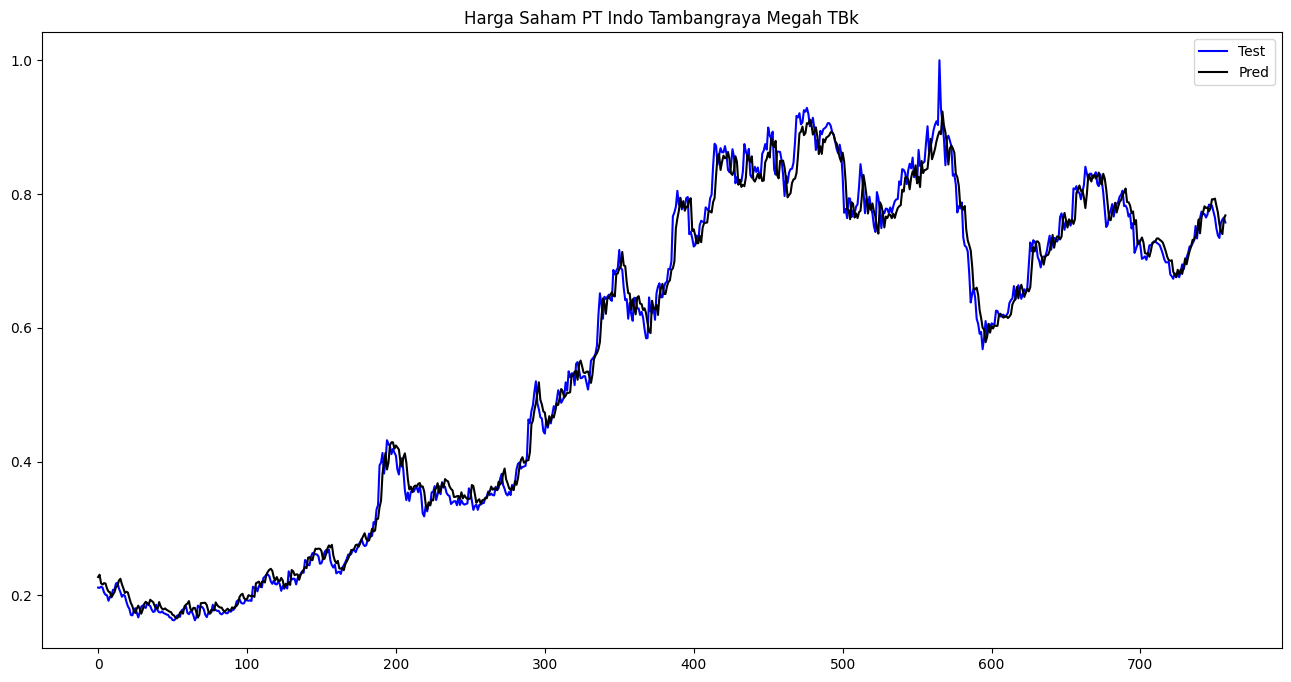

In [25]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_pred, color = 'black', label = 'Pred')
plt.title('Harga Saham PT Indo Tambangraya Megah TBk')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.021847852818048605


**Kesimpulan**: Berdasarkan metrik evaluasi yang umum digunakan yaitu Root Mean Square Error (RMSE), diperoleh nilai RMSE pada prediksi harga saham ITMG.JK adalah sebesar 0.02185 artinya bahwa nilai rata-rata dari selisih antara nilai prediksi dan nilai sebenarnya adalah sekitar 0.02185. Semakin kecil nilai RMSE, semakin baik kinerja model, karena ini menunjukkan bahwa model lebih dekat dengan nilai sebenarnya. Dalam kasus ini, RMSE yang dihasilkan dapat dikategorikan rendah dan menunjukkan bahwa model yang dibentuk relatif akurat dalam memprediksi nilai harga saham ITMG.JK.